In [ ]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

# Machine Learning
import sklearn.metrics as metrics

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords

from IPython.display import display

%pip install svgling
%pip install datasets

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from datasets import load_dataset

babe_dataset = load_dataset("mediabiasgroup/BABE-v3")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/4121 [00:00<?, ? examples/s]

In [ ]:
# convert to df
babe_df = pd.DataFrame(babe_dataset['train'])
babe_df_cleaned = babe_df[['text', 'topic']]

babe_df_cleaned.loc[:, 'topic'] = babe_df_cleaned.loc[:, 'topic'].apply(lambda x: " ".join(x.split("-")))

# print number of unique topics
print("Number of unique topics:", len(babe_df_cleaned['topic'].unique()))

babe_df_cleaned.head()

Number of unique topics: 22


,text,topic
0,But instead of closing loopholes that allow cr...,gun control
1,"""You think I'm joking,"" he continued. """,blm
2,"Yes, the rich are rich and want to stay that w...",taxes
3,Americans are carrying $1.57 trillion in outst...,student debt
4,Republican state legislators from Texas to Ari...,gun control


# Q1

In [ ]:
def make_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##

# Q1 - tokenize all cells in the 'text' column into lowercase words
#      display the tokens in the df as a new column called tokens

  # first change each sentence into lower case, then tokenize; then apply that
  # to each row in the tokens column

  df['tokens'] = df['text'].apply(lambda x: word_tokenize(x.lower()))

  ## end ##
  return df

In [ ]:
babe_df_cleaned = make_tokens(babe_df_cleaned)
print(babe_df_cleaned.loc[0, 'tokens'])

['but', 'instead', 'of', 'closing', 'loopholes', 'that', 'allow', 'criminals', 'to', 'access', 'firearms', ',', 'the', 'bill', 'by', 'house', 'democrats', 'could', 'turn', 'millions', 'of', 'law-abiding', 'american', 'gun', 'owners', 'into', 'felons', '.']


# Q2

In [ ]:
def clean_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##

  #Q2- Update the 'tokens' columns to remove all stop words and punctuation

  # setting a list of all stopwards to consider
  stop_words = set(stopwords.words("english"))

  # if word is a stop word or if a word is not "alphabetical in nature" then
  # return the word, we apply the list of filtered words to the tokens column

  df['tokens'] = df['tokens'].apply(lambda x: [word for word in x
                             if word not in stop_words and word.isalpha() ])


  ## end ##
  return df

In [ ]:
babe_df_cleaned = clean_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens'].iloc[0])


['instead', 'closing', 'loopholes', 'allow', 'criminals', 'access', 'firearms', 'bill', 'house', 'democrats', 'could', 'turn', 'millions', 'american', 'gun', 'owners', 'felons']


# Q3



In [ ]:
def stem_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##

  # got code and functionalities relating to NLTK snowball stemmer from:
  #https://www.nltk.org/howto/stem.html


  # Q3 - use NTLK's Snowball stemmer to stem all tokens in 'tokens' column and
  # save them in a new column called 'tokens_stemmed'

  # importing NLTK's Snowball Stemmer
  from nltk.stem.snowball import SnowballStemmer

  # creating an instance of Snowball Stemmer called stemmer
  stemmer = SnowballStemmer("english")

  # stemming each sentence in 'tokens' column and applying edited column to a
  # new column called 'tokens_stemmed'

  df['tokens_stemmed'] = df['tokens'].apply(lambda x:
                        [stemmer.stem(word) for word in x])

  ## end ##
  return df

In [ ]:
babe_df_cleaned = stem_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens_stemmed'].iloc[0])

['instead', 'close', 'loophol', 'allow', 'crimin', 'access', 'firearm', 'bill', 'hous', 'democrat', 'could', 'turn', 'million', 'american', 'gun', 'owner', 'felon']


# Q4

## (a)

<Axes: title={'center': 'Frequency of tokens'}, xlabel='Tokens', ylabel='Frequency'>

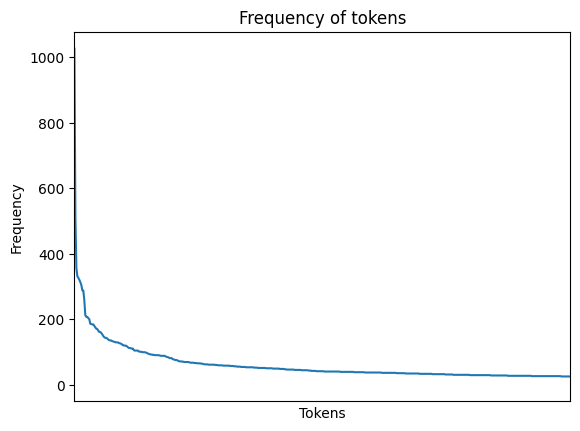

In [42]:
## Your code starts here ##

# Q4a - find and plot frequency of each token in tokens column sorted by
#        descending order, label all axis titles and title

# set a counter instance
token_counter = Counter()

# for each word in each index of tokens; count frequency of each word, store
# the frequency in the dictionary token_counter

# token_counter : each key is a unique token and each value is the frequency
# of the token

for sentence in babe_df_cleaned['tokens']:
    token_counter.update(sentence)

# convert dictionary into a df, make sure frequencies are sorted in descending
# order

token_freq_df = pd.DataFrame.from_dict(token_counter,orient = 'index',
      columns = ['Frequency']).sort_values(by = 'Frequency', ascending = False)

ax = token_freq_df.plot(legend=False, xlabel='Tokens', ylabel='Frequency',
                        title="Frequency of tokens")

ax.set_xticks([])
ax.set_xlim(0,500)
ax


## end ##

Enter answer here: Zipf distribution

## (b)

In [ ]:
## Your code starts here ##
# Q4b -print df showing top 10 words by frequency

token_freq_df.head(10)

## end ##

,Frequency
trump,1027
president,512
said,357
people,332
would,327
new,321
donald,314
white,305
police,289
coronavirus,288


# Q5

## (a)

In [41]:
## Your code starts here ##

# Q5a - using tokens column, calculate MI of top 500 most common tokens with all
#       topics, print the 10 tokens with highest MI scores in a dataframe
#       Ensure df contains 'Topic' 'Word' 'MI Score' columns and is grouped by
#       Topic. Also sort words in descending order by MI score


# gets the top 500 most common tokens

token_freq_df['word'] = token_freq_df.index # creates a word column in df
top500 = [tuple(x) for x in token_freq_df.head(500).to_numpy()] # creates a list
#of tuples that stores the name/word of each of the 500 most common tokens
#and their frequency

# create a binary list for each row in the dataset to see if it contains a top
# 500 token

freqText = [] # creates a list to store binary vals
# for each sentence, create a dictionary (using Counter) that stores each word
# the frequencies in which they occur in the sentence, then check if each word
# is in the top500 most common tokens list and assign a binary value according
# to that
for sentence in babe_df_cleaned['tokens']:
  tempCounter = Counter(sentence)
  top500_in_Text = [1 if tempCounter[word] > 0 else 0 for (wordCount,word) in
                                                                       top500]
  freqText.append(top500_in_Text)


# turn the binary list into a dataframe

freqTextDf = pd.DataFrame(freqText) # creates initial df with binary list

dfName = []
for Tuple in top500:
  dfName.append(Tuple[1]) # get each name of top 500 token
freqTextDf.columns = dfName # adds each name of top 500 token as column names of
#                             binary df

# Merge DataFrame with dataset DataFrame
finalTextDf = babe_df_cleaned[['text','topic']].join(freqTextDf)

# create a MI score list for each topic

unique_topics = finalTextDf['topic'].unique() # finding list of unique topics
overallDF = pd.DataFrame() # create a new empty dataframe
for topic in unique_topics:
  miScore = []

  # create a binary column for the current topic
  label_col = finalTextDf['topic'].copy()
  label_col[label_col != topic] = 0
  label_col[label_col == topic] = 1

  # get mi score for each word in current topic
  for word in top500:
    miScore.append([word[1]] + [metrics.mutual_info_score(label_col,
                                              finalTextDf[word[1]])] + [topic])
    # top500 contains a list of tuples, so word[1] refers to the actual name of
    # each top 500 token

  # combine the scores of all words for the topic into the df
  miScore_df = pd.DataFrame(miScore).sort_values(1,ascending = False)
  miScore_df.columns = ['Word', 'MI Score', 'Topic']
  overallDF = pd.concat([overallDF, miScore_df])

# show top 10 words for each topic
mi_scores = overallDF.set_index(['Word']).groupby('Topic')['MI Score'].nlargest(10).reset_index()
mi_scores

## end ##

,Topic,Word,MI Score
0,#metoo,sexual,0.007047
1,#metoo,women,0.003511
2,#metoo,trump,0.001809
3,#metoo,business,0.001152
4,#metoo,accused,0.001135
...,...,...,...
215,white nationalism,police,0.001917
216,white nationalism,biden,0.001917
217,white nationalism,culture,0.001852
218,white nationalism,would,0.001767


## (b)

In [40]:
## Your code starts here ##

# Q5a - using tokens_stemmed column, calculate MI of top 500 most common stemmed
#       tokens with all topics, print the 10 stemmed tokens with highest MI
#       scores in a dataframe. Ensure df contains 'Topic' 'Word' 'MI Score'
#       columns and is grouped by Topic. Also sort words in descending order by
#       MI score


# gets the top 500 most common tokens

token_freq_df['word'] = token_freq_df.index # creates a word column in df
top500 = [tuple(x) for x in token_freq_df.head(500).to_numpy()] # creates a list
#of tuples that stores the name/word of each of the 500 most common tokens
#and their frequency

# create a binary list for each row in the dataset to see if it contains a top
# 500 token

freqText = [] # creates a list to store binary vals
# for each sentence, create a dictionary (using Counter) that stores each word
# the frequencies in which they occur in the sentence, then check if each word
# is in the top500 most common tokens list and assign a binary value according
# to that
for sentence in babe_df_cleaned['tokens_stemmed']:
  tempCounter = Counter(sentence)
  top500_in_Text = [1 if tempCounter[word] > 0 else 0 for (wordCount,word) in
                                                                       top500]
  freqText.append(top500_in_Text)


# turn the binary list into a dataframe

freqTextDf = pd.DataFrame(freqText) # creates initial df with binary list

dfName = []
for Tuple in top500:
  dfName.append(Tuple[1]) # get each name of top 500 token
freqTextDf.columns = dfName # adds each name of top 500 token as column names of
#                             binary df

# Merge DataFrame with dataset DataFrame
finalTextDf = babe_df_cleaned[['text','topic']].join(freqTextDf)

# create a MI score list for each topic

unique_topics = finalTextDf['topic'].unique() # finding list of unique topics
overallDF = pd.DataFrame() # create a new empty dataframe
for topic in unique_topics:
  miScore = []

  # create a binary column for the current topic
  label_col = finalTextDf['topic'].copy()
  label_col[label_col != topic] = 0
  label_col[label_col == topic] = 1

  # get mi score for each word in current topic
  for word in top500:
    miScore.append([word[1]] + [metrics.mutual_info_score(label_col,
                                              finalTextDf[word[1]])] + [topic])
    # top500 contains a list of tuples, so word[1] refers to the actual name of
    # each top 500 token

  # combine the scores of all words for the topic into the df
  miScore_df = pd.DataFrame(miScore).sort_values(1,ascending = False)
  miScore_df.columns = ['Word', 'MI Score', 'Topic']
  overallDF = pd.concat([overallDF, miScore_df])

# show top 10 words for each topic
mi_scores = overallDF.set_index(['Word']).groupby('Topic')['MI Score'].nlargest(10).reset_index()
mi_scores


## end ##

,Topic,Word,MI Score
0,#metoo,sexual,0.007472
1,#metoo,women,0.003511
2,#metoo,trump,0.001812
3,#metoo,power,0.001351
4,#metoo,democrat,0.001038
...,...,...,...
215,white nationalism,biden,0.001917
216,white nationalism,gun,0.001774
217,white nationalism,would,0.001767
218,white nationalism,week,0.001457


## (c)


Enter answer here: If certain words are frequently used in a body of text, the (high/large) MI scores of these words with particular topics may give us an indication about what the topic of the text is about.

I believe table 5a with non-stemmed tokens are more useful for this, compared to stemmed tokens, because stemmed tokens can be derived from a wide range of words (which themselves can be associated with a wide range of topics), thus a stemmed token, which may have multiple large MI scores with different topics, may consequently, not be a great predictor of the topic of a text.   